# Cartes de géographie

Représentation de cartes de géographie

Pour ce cours, outre les bibliothèque par défaut de conda, on aura besoin de :
* [descartes](https://pypi.org/project/descartes/) pour dessiner des cartes : `pip install descartes`
* [geopandas](https://geopandas.org/) pour les dataframe geographiques : `pip install geopandas`
* [contextily](https://contextily.readthedocs.io/en/latest/) pour les fond de cartes : `pip install contextily`

## tutos

- https://www.youtube.com/watch?v=y85IKthrV-s&list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh 
- https://www.youtube.com/watch?v=t7lliJXFt8w

## lire les données

Il existe une multitude de format de cartes concurrents (une [explication](https://xkcd.com/927/) de cet état de fait). Heuresement, geopandas permet d'en lire la plupart et il les convertit à la volée au format geojson.

On va en voir deux geojson et shapefile.

**doc** : https://geopandas.org/io.html

### geojson

Le format [geojson](https://geojson.org/) est un format de représentation de données cartographiques.

On va utiliser [Grégoire David](https://github.com/gregoiredavid/france-geojson) et sa carte des [régions françaises](https://github.com/gregoiredavid/france-geojson/blob/master/departements-avec-outre-mer.geojson) (cliquez droit sur download pour récupérer le fichier geojson ou utilisez directectement l'url  comme ci-dessous).

In [65]:
import geopandas as gpd

In [66]:
regions = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions-avec-outre-mer.geojson")

geopandas crée un geodataframe avec ces données (on verra tout ça en détail dans le cours suivant) : 

In [67]:
regions

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49..."
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ..."
5,44,Grand Est,"POLYGON ((4.23316 49.95775, 4.23690 49.95858, ..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.62284 47.40975, -2.62341 47..."
7,53,Bretagne,"MULTIPOLYGON (((-3.47716 48.88127, -3.47863 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.41519 46.34722, 1.41675 46.3..."
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78661 42.5..."


In [68]:
type(regions)

geopandas.geodataframe.GeoDataFrame

geodataframe que l'on peut ensuite représenter graphiquement : 

<Axes: >

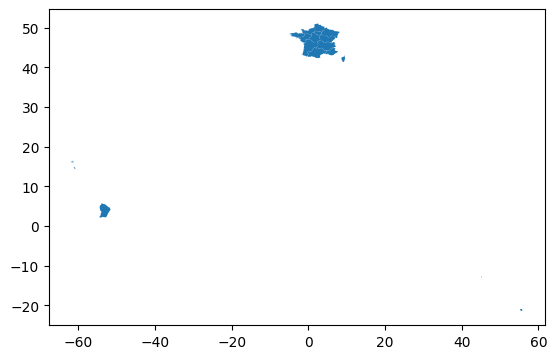

In [69]:
regions.plot()

### shapefile

Un standard de fait est le format [shapefile](https://fr.wikipedia.org/wiki/Shapefile). 

Ce format est en fait consitué de multiples fichiers, chacun avec sa propre extension (shp pour les formes, dbf pour les données associées, etc). C'est pourquoi les fichier shapefile viennent souvent sous la forme d'un fichier zip.

On va utiliser la carte du monde et des différents pays de [ce site](https://hub.arcgis.com/datasets/UIA::uia-world-countries-boundaries) : cliquez sur *télécharger* puis *shapefile*.

Si l'on décrompresse le fichier zip on voit qu'il est consitué de multiple fichier avec le même nom et différentes extensions. C'est l'ensemble de ces ficheirs qui correspond à nos données (les formes, les méta-données, etc).


geopandas permet de lire directement un fichier zip : 

In [70]:
# lecture d'un fichier zip dans le dossier où se trouve le notebook Jupyter

monde = gpd.read_file("zip://./UIA_World_Countries_Boundaries.zip")

on peut ensuite le représenter graphiquement :

<Axes: >

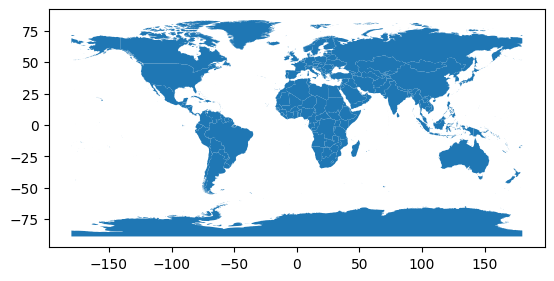

In [71]:
monde.plot()

On peut aussi charger le fichier shp du dossier décompressé.

In [72]:
monde_pas_zip = gpd.read_file("UIA_World_Countries_Boundaries/World_Countries_Generalized.shp")

<Axes: >

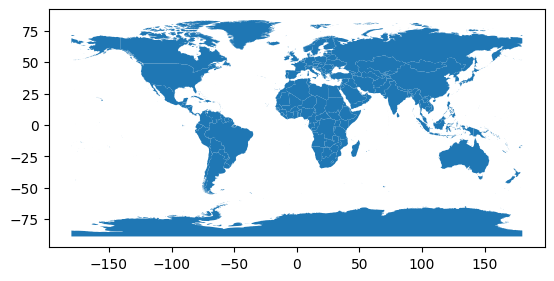

In [73]:
monde_pas_zip.plot()

Les 2 façons de faire sont équivalentes, geopandas lira également les autres fichier du dossier si l'on charge le fichier shp.

In [74]:
monde

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


In [75]:
monde_pas_zip

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


Si je crée un dossier avec uniquement les fichiers shp et shx, on voit que l'on a que les coordonnées géographiques :

In [76]:
gpd.read_file("fichier_shp_seul/World_Countries_Generalized.shp")

,geometry
0,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...
246,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


## dessiner une carte

geopandas utilise de façon cachée matplotlib pour représenter les cartes. Faisons le explicitement, ce qui nous permettra de contrôler le dessin.

###  axes

La première chose à faire est de dessiner sur ce que l'on veut. On commence donc par créer notre dessin (avec la commande [subplots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)) de taille 20x5, puis on dessine dessus.

In [77]:
import matplotlib.pyplot as plt

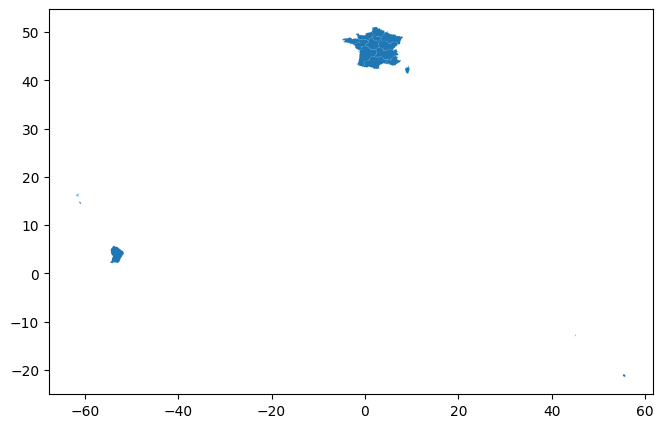

In [78]:
fig, ax = plt.subplots(figsize=(20, 5)) 

regions.plot(ax=ax)

plt.show()

Mettons côte à cote la France et le monde :

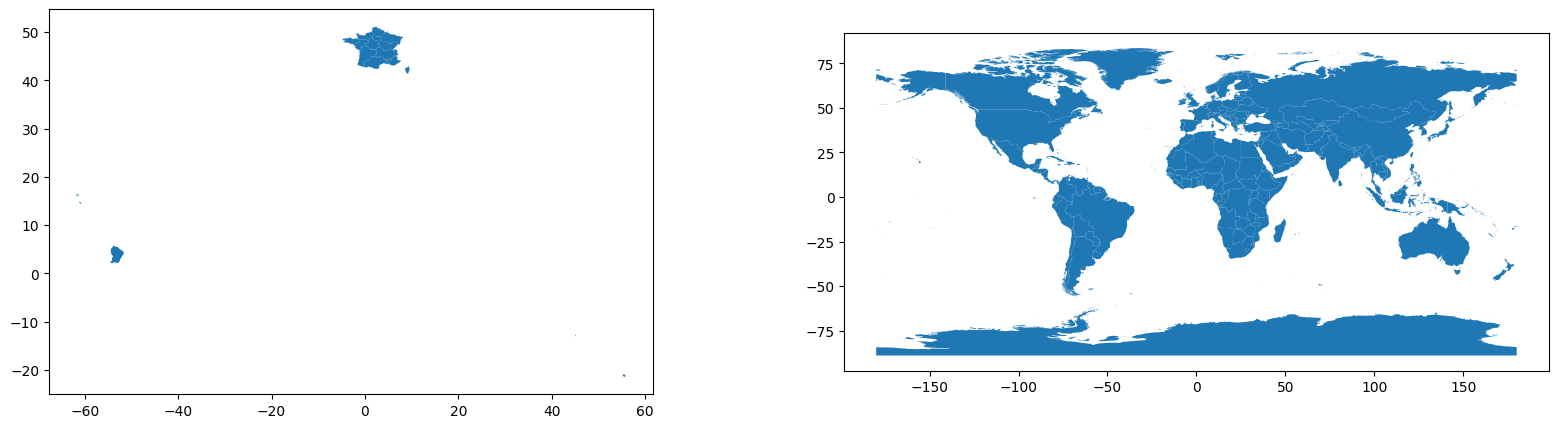

In [79]:
fig, ax = plt.subplots(figsize=(20, 5), ncols=2) 

regions.plot(ax=ax[0])
monde.plot(ax=ax[1])

plt.show()

### legendes et coordonnées


- se centrer sur la réunion (puis sur la métropole)
- enlever les axes


Reprenons la France :

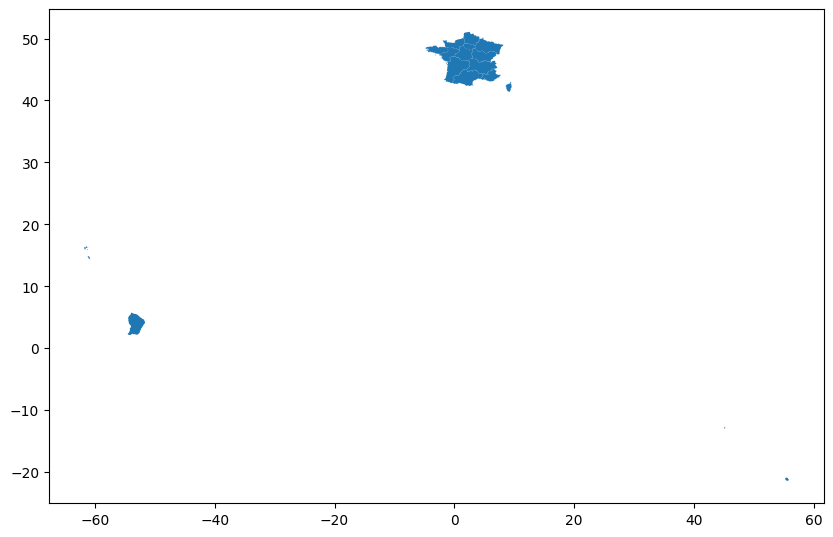

In [80]:
fig, ax = plt.subplots(figsize=(10, 10)) 

regions.plot(ax=ax)

plt.show()

Concentrons nous sur la réunion (en bas à droite) en délimitant les bornes des axes : 

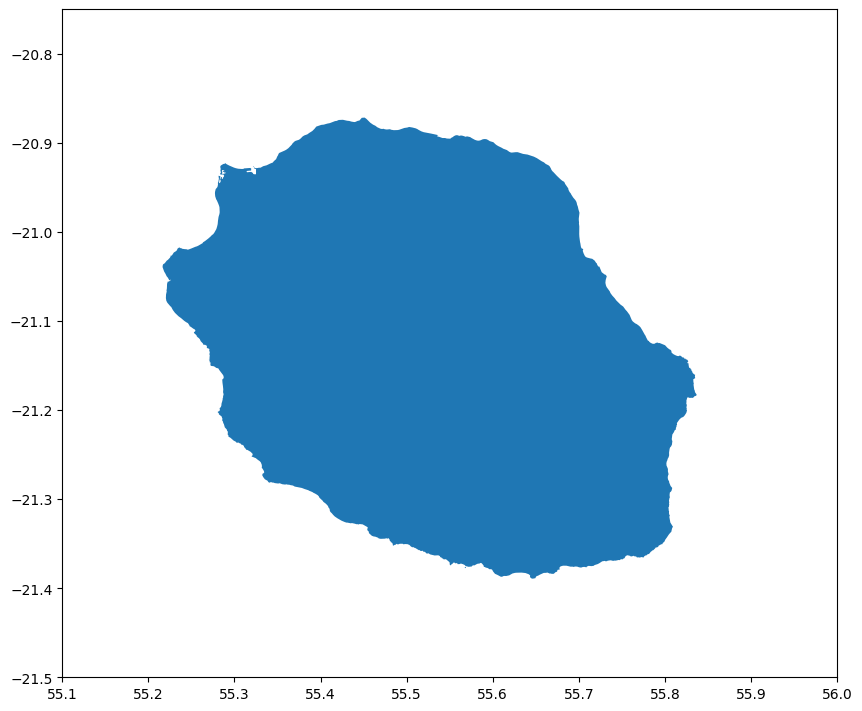

In [81]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(55.1, 56)
ax.set_ylim(-21.5, -20.75)

regions.plot(ax=ax)

plt.show()

Puis supprimons les graduations :

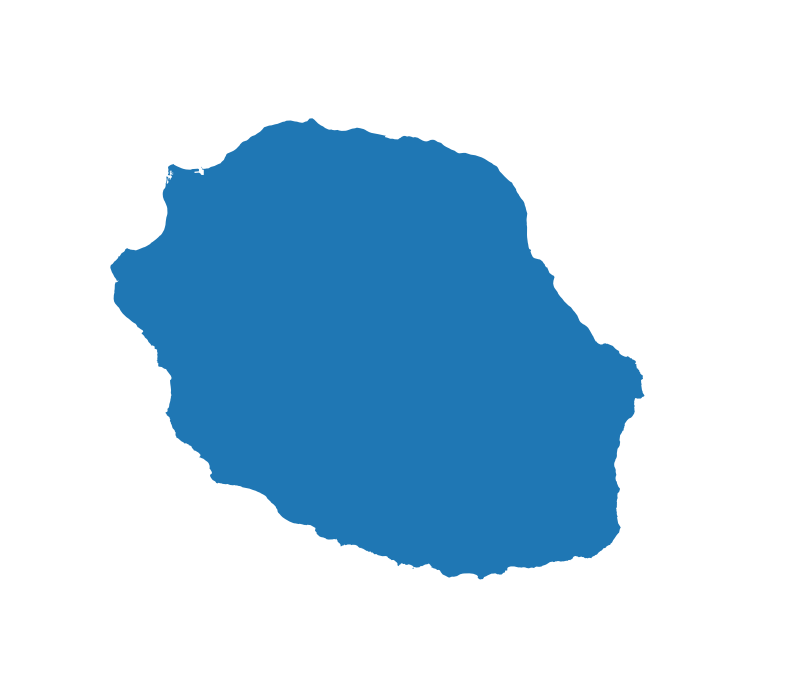

In [82]:
fig, ax = plt.subplots(figsize=(10, 10)) 

ax.set_xlim(55.1, 56)
ax.set_ylim(-21.5, -20.75)
ax.axis('off')

regions.plot(ax=ax)

plt.show()

### titres

[set_title](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html)

Il y a deux titre, celui du dessin et un pour chaque axe. Le texte est également très [paramétrable](https://matplotlib.org/3.1.1/api/text_api.html#matplotlib.text.Text)

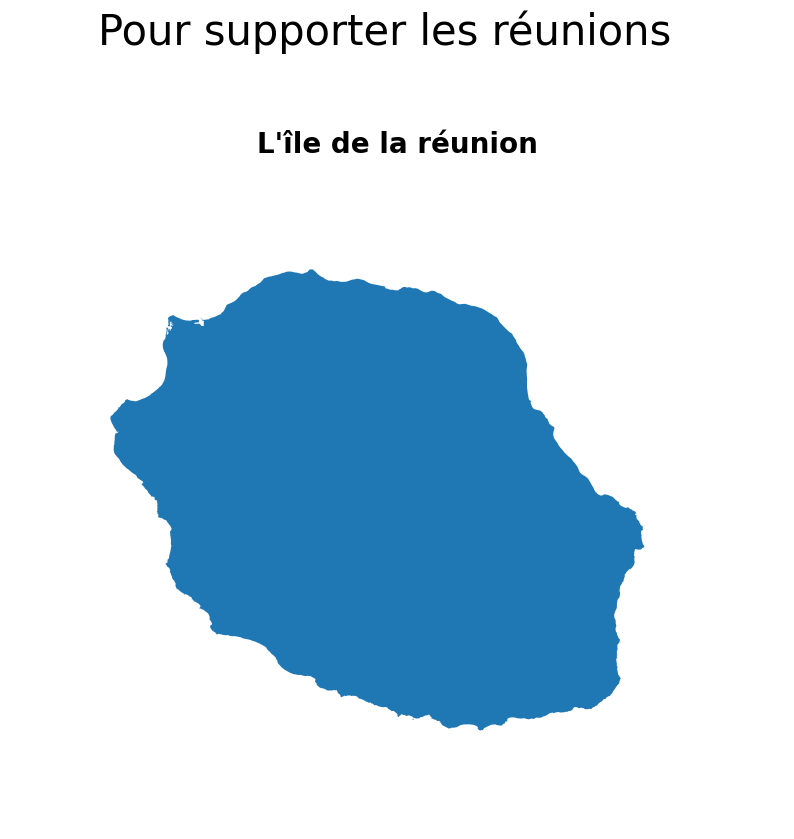

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(55.1, 56)
ax.set_ylim(-21.5, -20.75)
ax.axis('off')

fig.suptitle('Pour supporter les réunions', 
             fontsize=30)

ax.set_title("L'île de la réunion",
             fontsize=20,
             fontweight="bold"
            )

regions.plot(ax=ax)

plt.show()

## Gestion des couleurs

Prenons la métropole : 

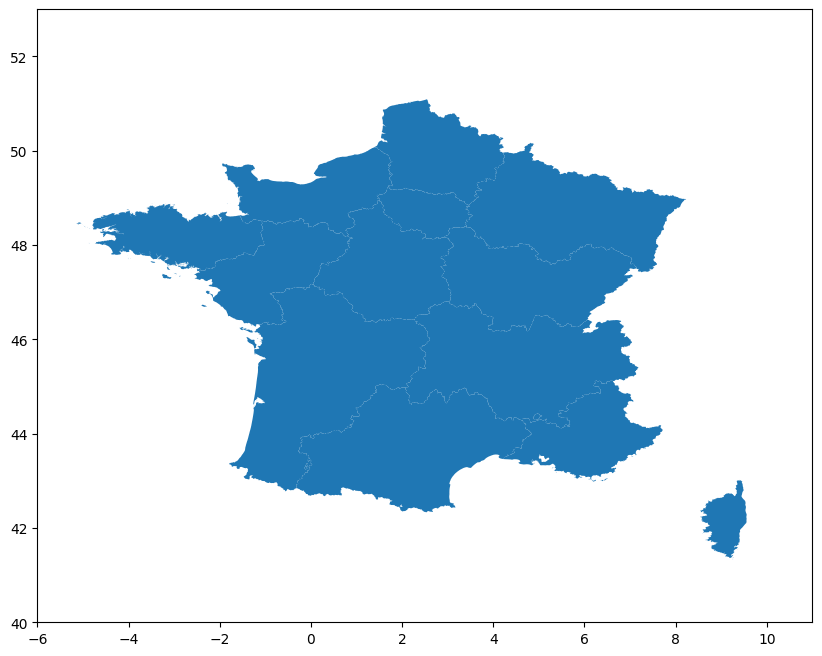

In [84]:
fig, ax = plt.subplots(figsize=(10, 10)) 

ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

regions.plot(ax=ax)

plt.show()

### quoi colorier

#### dessin

Chaque dessin est constitué d'un fond (`color`) et d'un bord (`edgecolor`).

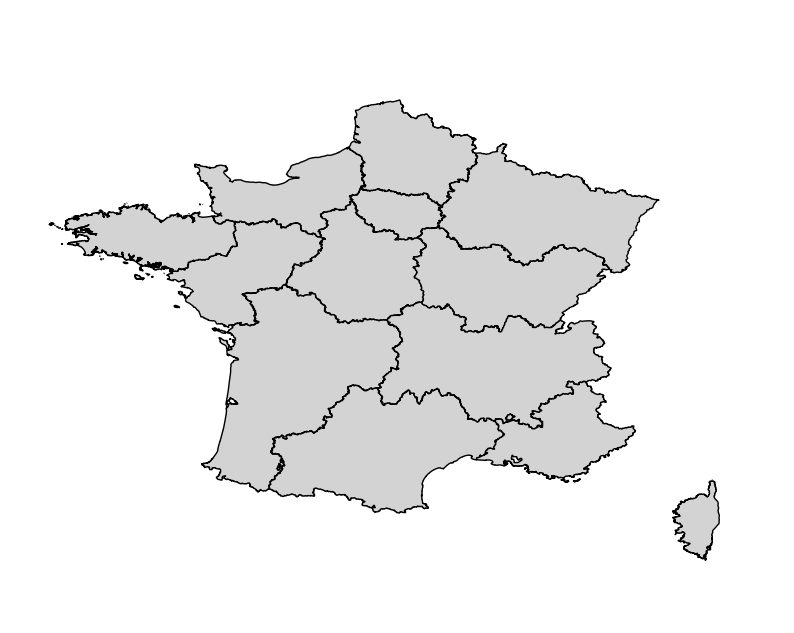

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

regions.plot(ax=ax,
            color="lightgrey",
            edgecolor="black")

plt.show()

#### fond

Le fond est séparé en 2 entités : la figure et les axes qui ont chacune leur couleur.

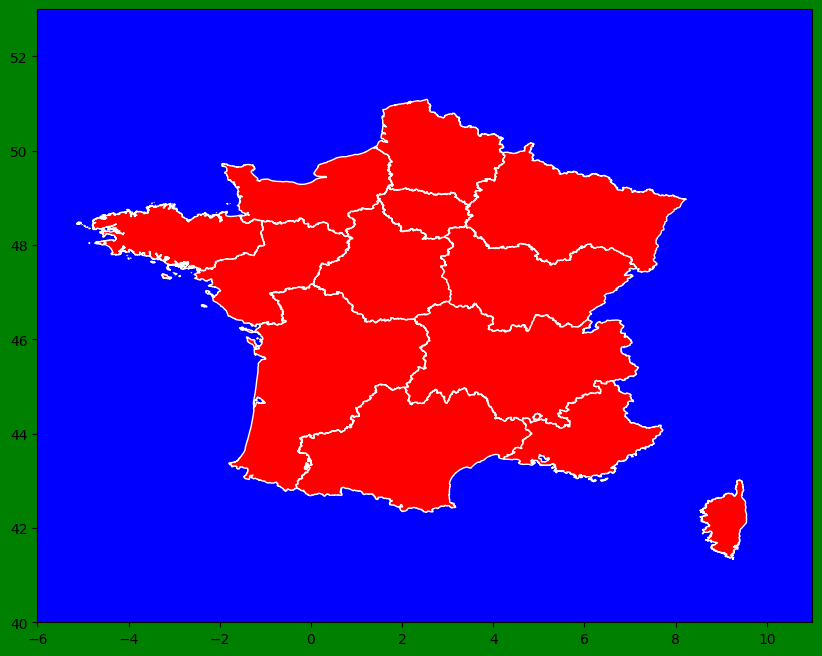

In [86]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

fig.patch.set_facecolor('green')
ax.patch.set_facecolor('blue')

regions.plot(ax=ax,
             color="red",
            edgecolor="white")

plt.show()

Notez que si l'on supprime les axes, la couleur des axes n'est pas montrée :

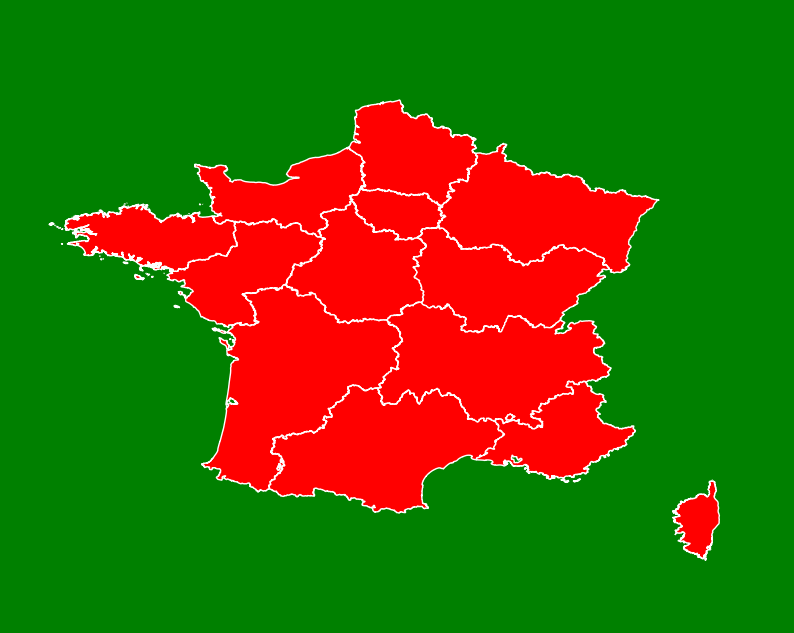

In [87]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

fig.patch.set_facecolor('green')
ax.patch.set_facecolor('blue')

regions.plot(ax=ax,
             color="red",
            edgecolor="white")

plt.show()

### couleurs

Une couleur peut être [beaucoup de chose](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) :

#### noms 

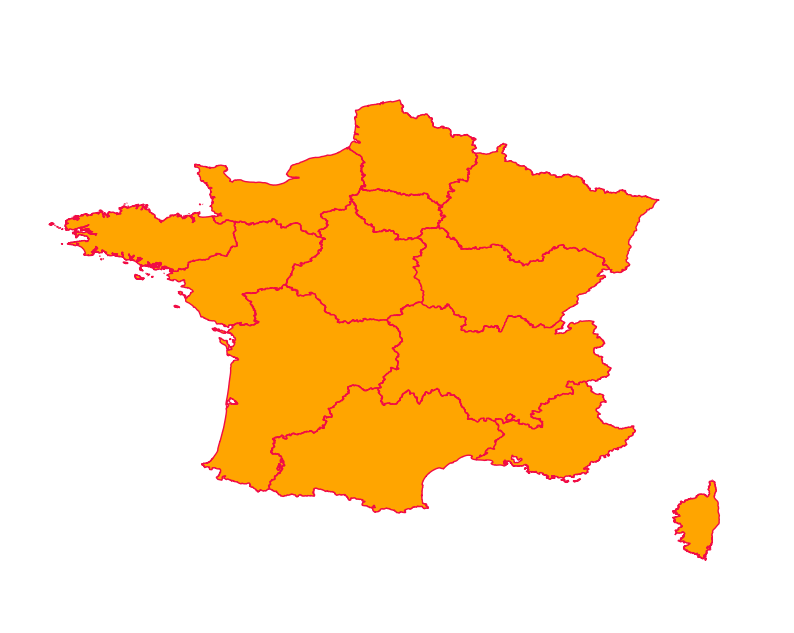

In [88]:
fig, ax = plt.subplots(figsize=(10, 10)) 

ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

regions.plot(ax=ax,
            color="orange",
            edgecolor="xkcd:pinkish red")

plt.show()

Ou des couleurs seaborn :

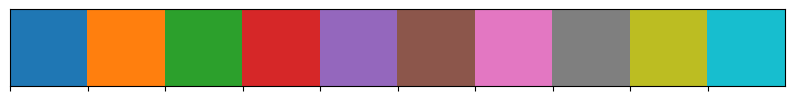

In [89]:
import seaborn as sns

sns.palplot(sns.color_palette()) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

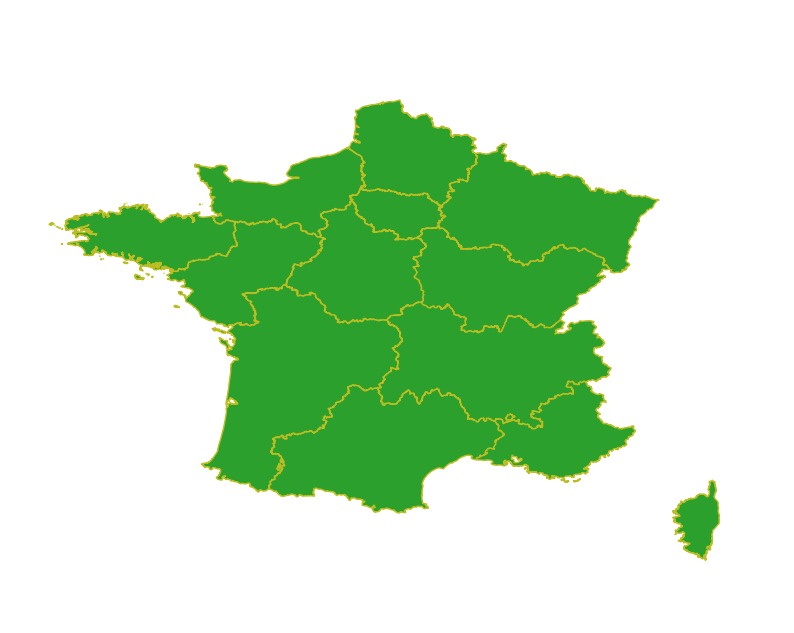

In [90]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

regions.plot(ax=ax,
            color=sns.color_palette()[2],
            edgecolor=sns.color_palette()[8])

plt.show()

### un code RGB

On a tout le contrôle nécessaire puisque l'on peut directement utiliser des code [RGB](https://color.adobe.com/fr/create/color-wheel).

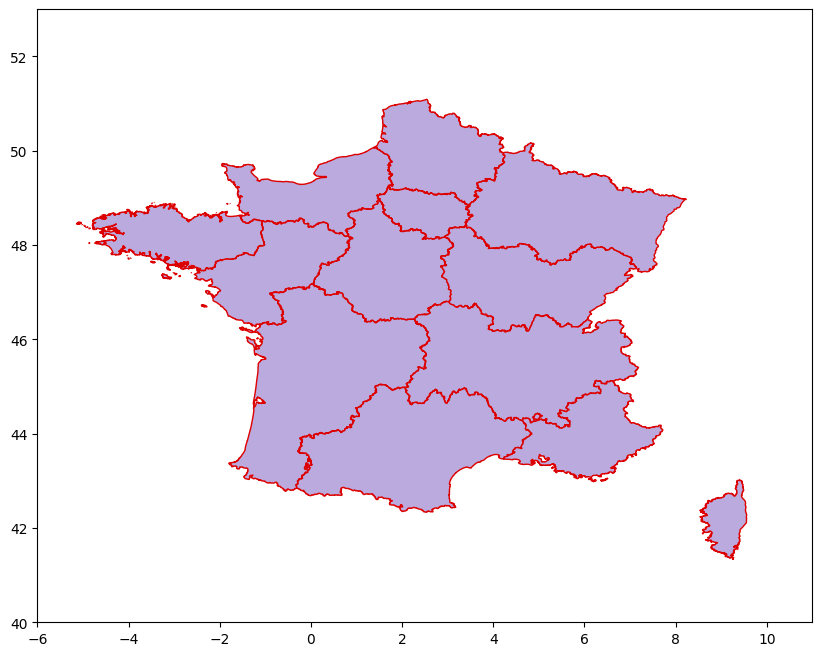

In [91]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

#ax.axis('off')

regions.plot(ax=ax,
            color="#bbaadd",
            edgecolor="#dd0000")

plt.show()

### des entiers ou des réels

On peut faire ses propres couleurs avec des listes de pourcentage de couleurs (réels de 0 à 1).

In [92]:
# valeur en base 10 des couleurs de la carte précédente

0xbb, 0xaa, 0xdd

(187, 170, 221)

In [93]:
#pourcentages 

0xbb / 255, 0xaa / 255, 0xdd / 255

(0.7333333333333333, 0.6666666666666666, 0.8666666666666667)

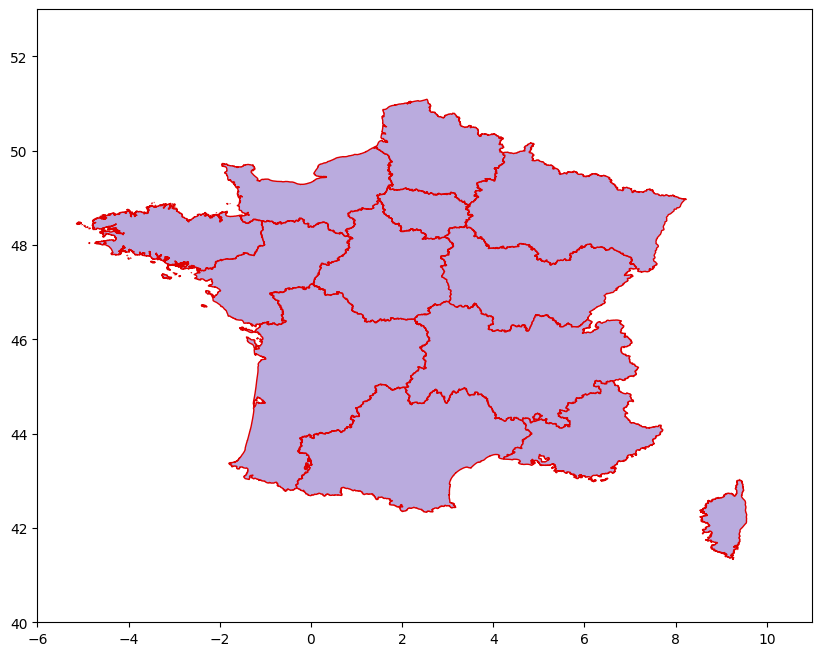

In [94]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

#ax.axis('off')

regions.plot(ax=ax,
            color=(0.73, 0.67, 0.87),
            edgecolor=(.87, 0.0, 0.0))

plt.show()

### pas de couleurs

On peut aussi, ne pas mettre de couleur en utilsant le mot clé `"none"`

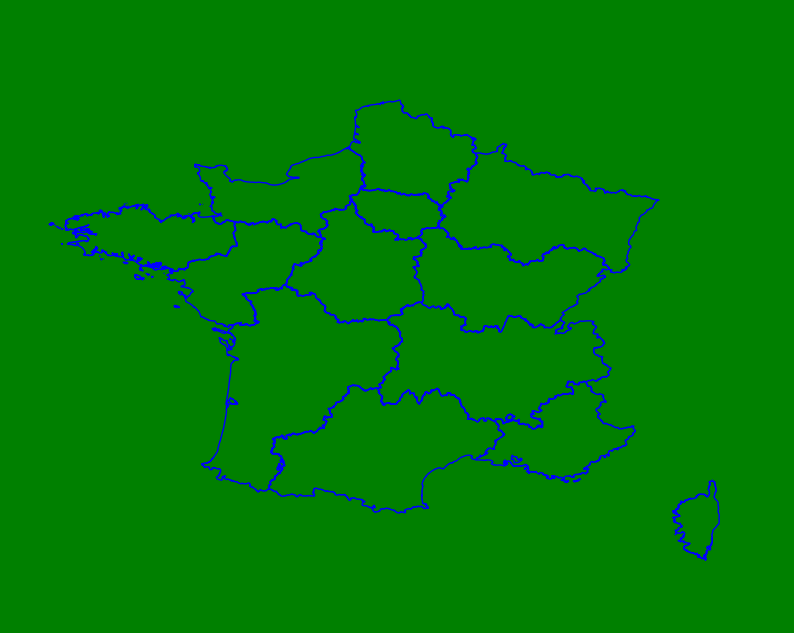

In [95]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

fig.patch.set_facecolor('green')

regions.plot(ax=ax,
            color="none",
            edgecolor="blue")

plt.show()

### la transparence

On gère la transpacence soit avec un paramètre spécifique soit en ajoutant une *coordonnée* de transparence.


#### paramètre

Ce paramètre désigne le caratère de transparence pour tout le dessin (fond et bord)

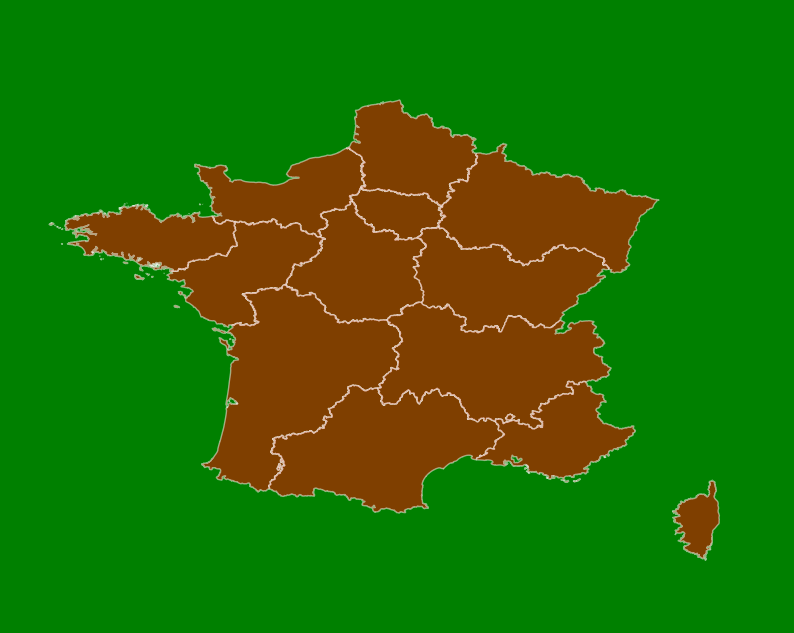

In [96]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

fig.patch.set_facecolor('green')
ax.patch.set_facecolor('blue')

regions.plot(ax=ax,
             color="red",
            edgecolor="white",
            alpha=0.5)

plt.show()

#### pour chaque couleur 

On a juste ajouté la transparence dans la définition de la couleur (équivalent à #ff00007f)

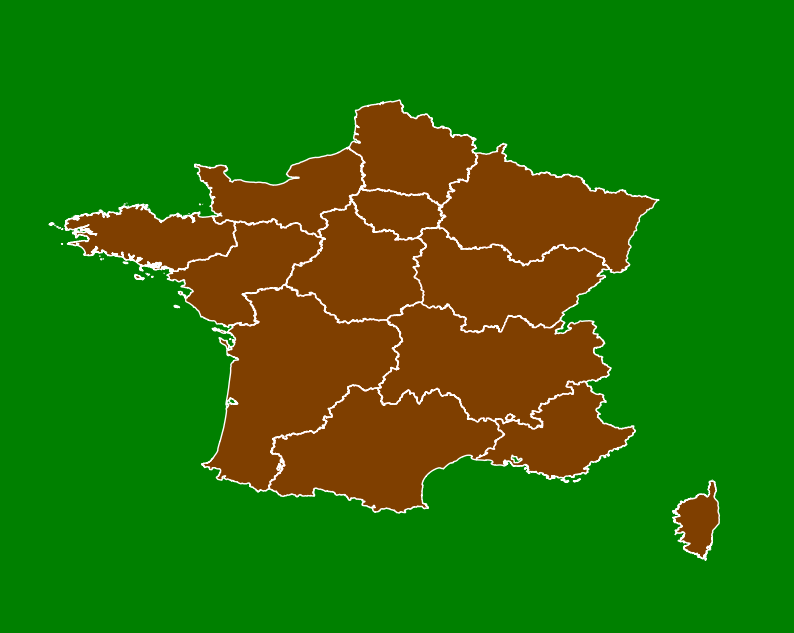

In [97]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

fig.patch.set_facecolor('green')
ax.patch.set_facecolor('blue')

regions.plot(ax=ax,
             color=(1, 0, 0, .5),
             edgecolor="white")

plt.show()

### couleurs différentes par régions

un dessin d'une geodataframe est une supperposition de dessins de chacune de ses lignes.

On peut du coup représenter une couleur différente par ligne. Il est cependant déconseillé d'utiliser trop de couleurs, c'est souvent pas beau et ça distrait le lecteur du but de la carte. Préférez peu de couleurs ayant chacune une utilité pour la compréhension deu dessin.


#### listes

On peut représenter du coup une couleur différente pour chaque ligne en passant en paramètre de la couleur une liste au moins aussi longue que le nombre de lignes.

On a ci-dessous doublé la palette de seaborn :

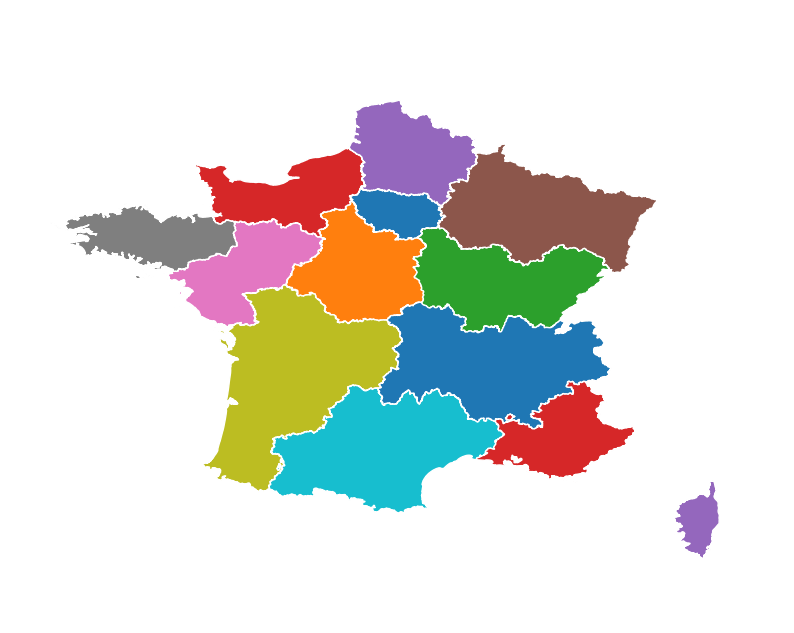

In [98]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

regions.plot(ax=ax,
             color=sns.color_palette() * 2,
            edgecolor="white")

plt.show()

Les couleurs ont été prises ligne à ligne, ce qui permet de choisir une couleur particulière pour chaque ligne.

In [99]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [100]:
regions

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49..."
4,32,Hauts-de-France,"POLYGON ((4.14090 49.97876, 4.14407 49.97625, ..."
5,44,Grand Est,"POLYGON ((4.23316 49.95775, 4.23690 49.95858, ..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.62284 47.40975, -2.62341 47..."
7,53,Bretagne,"MULTIPOLYGON (((-3.47716 48.88127, -3.47863 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.41519 46.34722, 1.41675 46.3..."
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78661 42.5..."


Une couleur pour PACA et une autre couleur pour les autres :

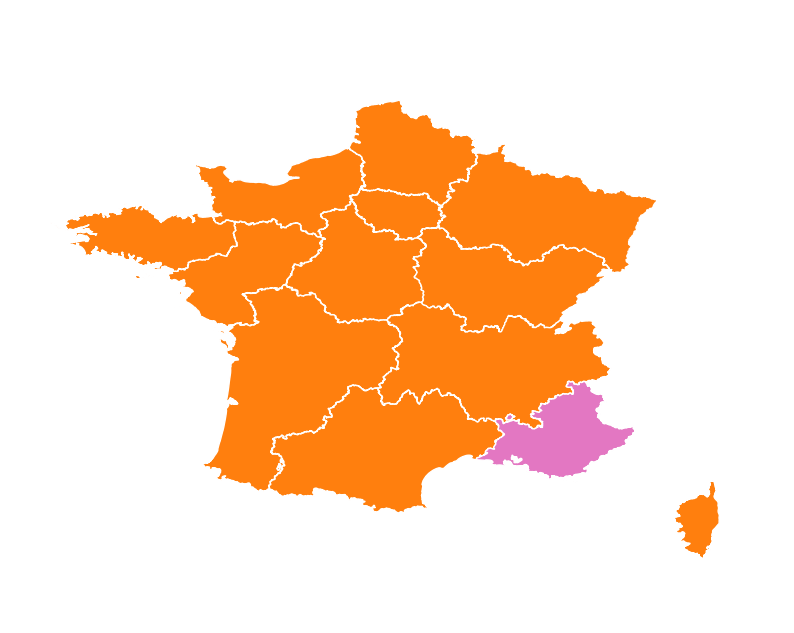

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

regions.plot(ax=ax,
             color= [sns.color_palette()[1]] * 13 + [sns.color_palette()[6]] + [sns.color_palette()[1]] * 4,
             edgecolor="white")

plt.show()

#### gradiant

Matplotlib possède pluseurs [gradiant](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) de couleurs.

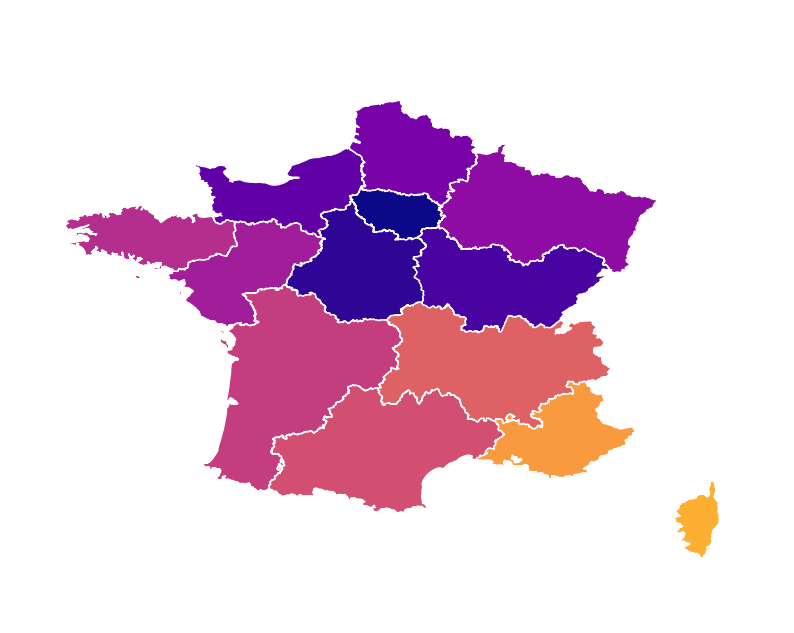

In [102]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(-6, 11)
ax.set_ylim(40, 53)

ax.axis('off')

regions.plot(ax=ax,
             cmap = 'plasma',
             edgecolor="white")

plt.show()

### fond de carte

https://geopandas.org/gallery/plotting_basemap_background.html


In [103]:
import contextily as ctx

On le verra dans la suite, mais une carte est une projection de la terre considérée comme un ellipsoide sur un plan. Il y a de nombreuses façon de faire et il est crutial de faire correspondre les projections de la carte et du fond de carte.

In [104]:
regions.crs.to_string()

'EPSG:4326'

C'est la projection du GPS : <https://epsg.io/4326>

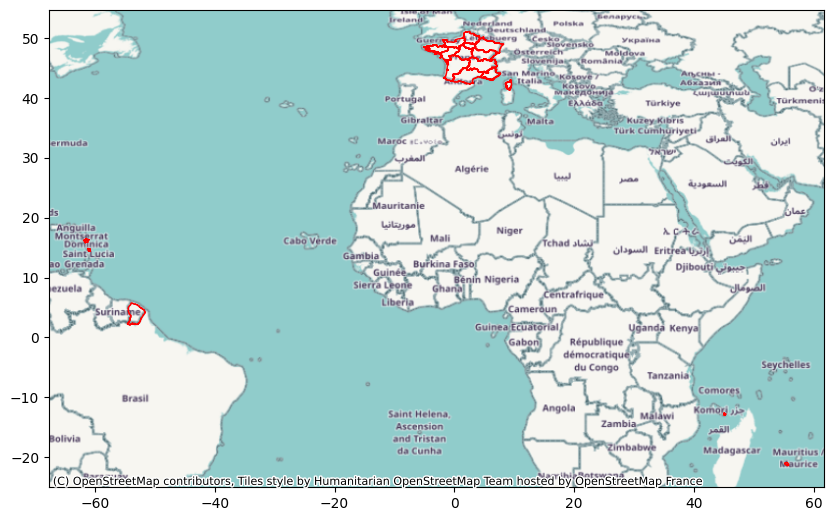

In [105]:
fig, ax = plt.subplots(figsize=(10, 10)) 


regions.plot(ax=ax,
        color="none",
        edgecolor="red")
ctx.add_basemap(ax, crs=regions.crs.to_string())

plt.show()


En convertissant au format Mercator des cartes "classiques" (<https://epsg.io/3857>)

In [106]:
# conversion au crs mercator

df = regions.to_crs(epsg=3857)

In [107]:
df.crs.to_string()

'EPSG:3857'

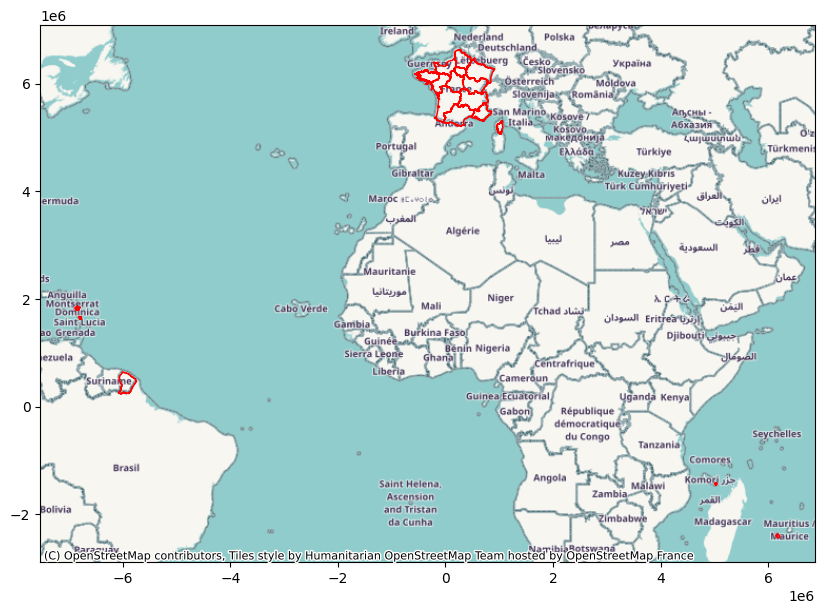

In [108]:
fig, ax = plt.subplots(figsize=(10, 10)) 


df.plot(ax=ax,
        color="none",
        edgecolor="red")
ctx.add_basemap(ax, crs=df.crs.to_string())

plt.show()

On ne peut plus zoomer, il faut réduire le dataframe :

In [109]:
df

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((288375.367 6288387.155, 288987.624 6..."
1,24,Centre-Val de Loire,"POLYGON ((320002.348 6027437.453, 320582.322 6..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((404025.186 5901275.021, 403705.699 5..."
3,28,Normandie,"MULTIPOLYGON (((-124635.528 6335410.964, -1241..."
4,32,Hauts-de-France,"POLYGON ((460962.879 6442598.259, 461315.762 6..."
5,44,Grand Est,"POLYGON ((471233.216 6438962.098, 471649.551 6..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-291973.213 6009214.055, -2920..."
7,53,Bretagne,"MULTIPOLYGON (((-387075.681 6254739.357, -3872..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((157538.230 5836167.136, 157711..."
9,76,Occitanie,"MULTIPOLYGON (((198831.082 5247296.019, 198884..."


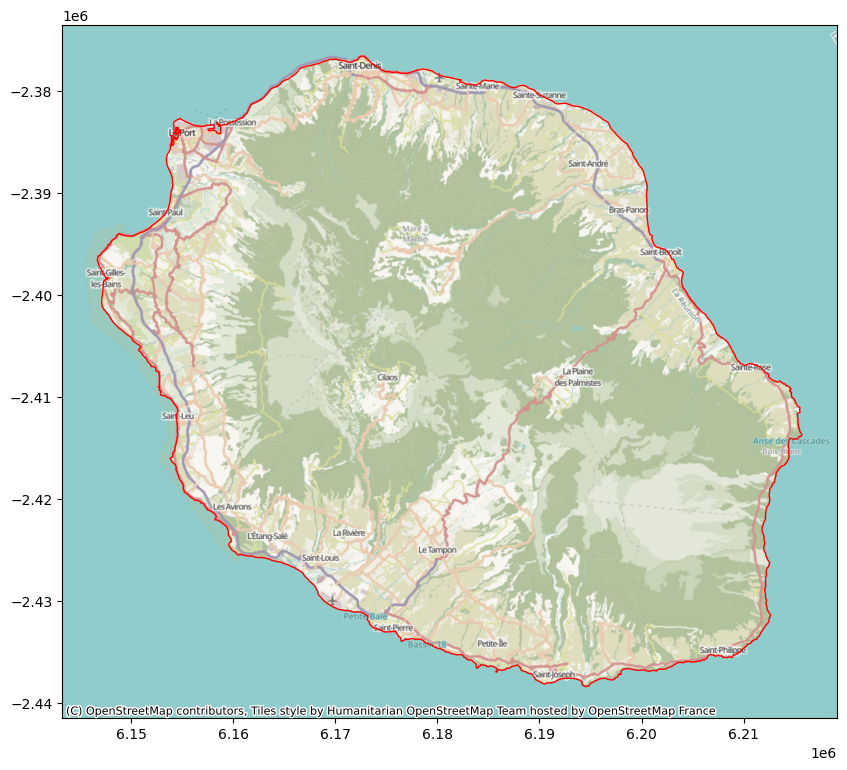

In [110]:
fig, ax = plt.subplots(figsize=(10, 10)) 


df.loc[[16]].plot(ax=ax,
             color="none",
            edgecolor="red")
ctx.add_basemap(ax, crs=df.crs.to_string())

plt.show()

**Note** : on a utilisé `df.loc[[16]]` qui rend un dataframe contenant les lignes choisies (ici juste celle d'index 16) et non pas `df.loc[16]` qui rendrait la ligne d'index 16 (ce serait une serie et par un dataframe).

### supperpositions de dessins

In [111]:
from matplotlib.patches import Circle

supperposer des cercles, des cartes, des disques de tailles différentes

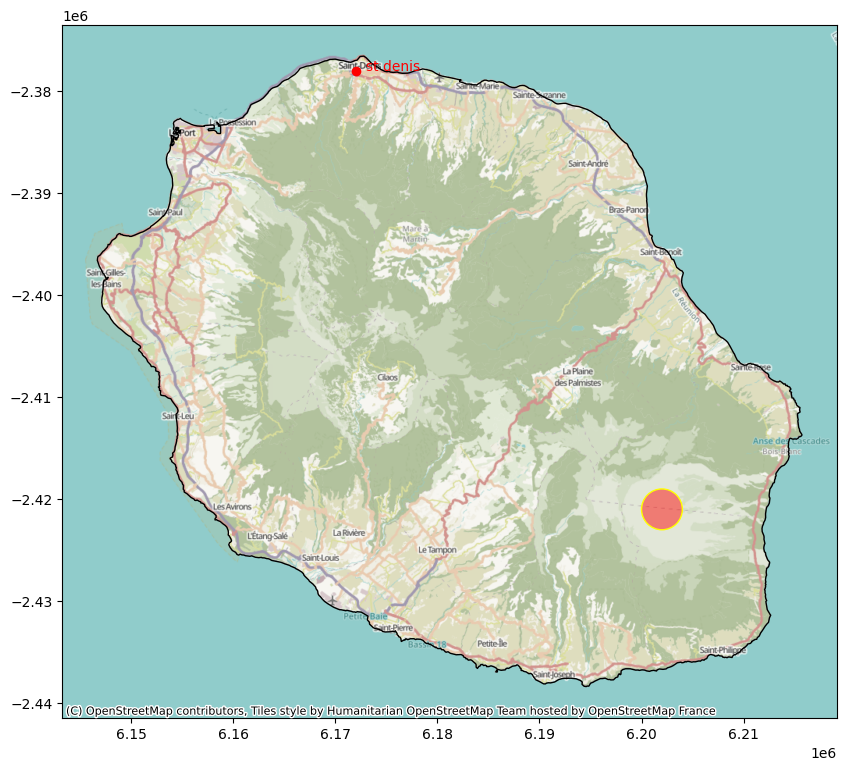

In [112]:
fig, ax = plt.subplots(figsize=(10, 10)) 



df.loc[[16]].plot(ax=ax,
             color="none",
            edgecolor="black")
ctx.add_basemap(ax, crs=df.crs.to_string())

ax.text(6.173e6, -2.378e6, "st denis", color="red")
ax.scatter([6.172e6], [-2.378e6], color="red")

ax.add_artist(Circle((6.202e6, -2.421e6), .002e6, 
                     facecolor="#FF000077", 
                     edgecolor="yellow"))

plt.show()


## créer ses propres cartes

**TBD** 

* https://www.youtube.com/watch?v=LwpqA2WMR_8
* stockage en [geojson](https://geojson.org/), https://geojson.io/
* https://www.naturalearthdata.com/